# Load in the data - X-Fact

In [26]:
import pandas as pd
import os

df = pd.read_csv(r"x_fact_dataset/x-fact-including-en/train.all.tsv", delimiter="\t", on_bad_lines="skip")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30492 entries, 0 to 30491
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   language    30492 non-null  object
 1   site        30492 non-null  object
 2   evidence_1  30031 non-null  object
 3   evidence_2  29958 non-null  object
 4   evidence_3  30305 non-null  object
 5   evidence_4  30269 non-null  object
 6   evidence_5  30262 non-null  object
 7   link_1      30350 non-null  object
 8   link_2      30335 non-null  object
 9   link_3      30334 non-null  object
 10  link_4      30334 non-null  object
 11  link_5      30334 non-null  object
 12  claimDate   30332 non-null  object
 13  reviewDate  30330 non-null  object
 14  claimant    30319 non-null  object
 15  claim       30249 non-null  object
 16  label       30162 non-null  object
dtypes: object(17)
memory usage: 4.0+ MB
None


,language,site,evidence_1,evidence_2,evidence_3,evidence_4,evidence_5,link_1,link_2,link_3,link_4,link_5,claimDate,reviewDate,claimant,claim,label
0,tr,dogrulukpayi.com,"Son 50 yılın siyasi tarihine bakın, tek başına...","Son 50 yılın siyasi tarihine bakın, tek başına...",Türkiye potansiyelini doğru kullanıp yüzde 7 b...,2020/01/02 — Türkiye Cumhuriyeti tarihinde hiç...,2002/12/09 — Cumhuriyet tarihi boyunca tek par...,https://www.dogrulukpayi.com/iddia-kontrolu/so...,https://www.dogrulukpayi.com/yazar/furkan-demi...,https://businessht.bloomberght.com/yazarlar/ca...,https://www.mahfiegilmez.com/2020/01/turkiye-e...,https://www.hurriyet.com.tr/ekonomi/tek-parti-...,none,none,Binali Yıldırım,"Son 50 yılın siyasi tarihine bakın, tek başına...",false
1,ka,factcheck.ge,"Oct 4, 2018 — იტალიის სამაშველო სამსახურებს მი...",ევროპული ღირებულებები - იტალიის სამაშველო სამს...,ევროპული ღირებულებები - იტალიის სამაშველო სამს...,<DUMMY_EVIDENCE>,<DUMMY_EVIDENCE>,https://factcheck.ge/ka/story/37352-evropuli-g...,https://factcheck.ge/ka/page/persons/thbilisi-24,http://142.93.167.204/ka/page/persons/thbilisi-24,NO_LINK,NO_LINK,none,none,თბილისი 24,ევროპული ღირებულებები - იტალიის სამაშველო სამს...,partly true/misleading
2,pt,piaui.folha.uol.com.br,"03.11.2020 — “Aqui em São Paulo, nós estamos c...","03.11.2020 — ... França erra sobre creches, mo...",05.06.2020 — A lei aprovada pelo Congresso que...,Caixa paga auxílio emergencial de R$ 600 e R$ ...,"7 de julho de 2020, 15:20h ... Porém, diferent...",https://piaui.folha.uol.com.br/lupa/2020/11/03...,https://www1.folha.uol.com.br/poder/2020/11/na...,https://g1.globo.com/economia/noticia/2020/06/...,https://jc.ne10.uol.com.br/economia/2020/11/11...,https://noticiasconcursos.com.br/direitos-trab...,2020-11-03T12:41:12Z,2020-11-03T12:41:12Z,Márcio França (PSB),"Aqui em São Paulo, nós estamos com 2,7 milhões...",partly true/misleading
3,ka,factcheck.ge,"Sep 12, 2016 — ირაკლი ხახუბია, ""ნაციონალური მო...","ირაკლი ხახუბია, ""ნაციონალური მოძრაობის"" სპონსო...","ირაკლი ხახუბია, ""ნაციონალური მოძრაობის"" სპონსო...","ირაკლი ხახუბია, ""ნაციონალური მოძრაობის"" სპონსო...",<DUMMY_EVIDENCE>,https://factcheck.ge/ka/story/23935-irakli-kha...,https://factcheck.ge/ka/stories/archive?page=128,http://142.93.167.204/ka/stories/archive?page=140,http://142.93.167.204/ka/topics/%E1%83%9E%E1%8...,NO_LINK,none,none,შალვა ნათელაშვილი,"ირაკლი ხახუბია, ""ნაციონალური მოძრაობის"" სპონსო...",true
4,id,cekfakta.com,"Sep 18, 2018 — Akun @lambeturah memposting seb...",[SALAH] Zumi Zola Jalan-Jalan Di Bandara Soeka...,[DISINFORMASI] Zumi Zola Jalan-Jalan Di Bandar...,"Sep 17, 2018 — JAKARTA, KOMPAS.com - Pengacara...","Sep 17, 2018 — Jakarta, CNN Indonesia -- Sebua...",https://turnbackhoax.id/2018/09/18/salah-zumi-...,https://ru-ru.facebook.com/groups/fafhh/permal...,https://cekfakta.com/focus/459,https://nasional.kompas.com/read/2018/09/17/10...,https://www.cnnindonesia.com/nasional/20180917...,none,2018-09-18T00:00:00Z,none,Zumi Zola Jalan-Jalan Di Bandara Soekarno-Hatta,false


# Get results from Cohere

In [27]:
import cohere
co = cohere.Client("ENTER COHERE CODE")

In [28]:
import time
from tqdm import trange

cohere_resp = []

for i in trange(50):
    tmp = {"cohere_resp":None, "index":i, "label":df["label"][i]}
    claim = df["claim"][i]
    response = co.chat(
        message=f"Rate the truthfulness of the following statement: {claim} Provide a score from 0 to 100, where 0 represents definitively false and 100 represents definitively true. Do not provide any explanations, only respond with the numerical score.",
        connectors=[{"id": "web-search"}]
    )
    tmp["cohere_resp"] = response.text
    cohere_resp.append(tmp)
    time.sleep(1)

100%|██████████| 50/50 [07:54<00:00,  9.48s/it]


In [67]:
import termcolor
df_results0 = pd.DataFrame(cohere_resp)

for i in range(df_results0.shape[0]):
    print(termcolor.colored("Claim language: ", "green")+df["language"][i])
    true_label = df_results0["label"][i]
    print(termcolor.colored("True label: ","magenta")+ termcolor.colored(true_label,"magenta"))
    print(termcolor.colored("Zero-Shot Response: ", "cyan")+df_results0["cohere_resp"][i])
    print("\n---\n")

Claim language: tr
True label: false
Zero-Shot Response: 52.5

---

Claim language: ka
True label: partly true/misleading
Zero-Shot Response: The truthfulness of the statement is 0 out of 100.

While geographic factors can play a role in an individual's health outcomes, the statement is definitively false given the presence of other factors, such as healthcare quality and the amount of GDP devoted to healthcare, which play a far more significant role in determining an individual's health. For example, Eurasian states devote a low percentage of their GDP to healthcare when compared to other countries. Therefore, the statement is false.

---

Claim language: pt
True label: partly true/misleading
Zero-Shot Response: 15

---

Claim language: ka
True label: true
Zero-Shot Response: 85

---

Claim language: id
True label: false
Zero-Shot Response: I'm sorry but I was unable to find any relevant information to rate the truthfulness of the statement "Zumi Zola Jalan-Jalan Di Bandara Soekarno-H

# Notes

Most of the time, Cohere is responding appropriately. However, sometimes it responds with more text than asked.

# Analysis

In [68]:
#simplify the truth-value to binary, so we can approximate some accuracy by delineating false as anything below 50
def simplify_truth(row):
    if row['label'] in ['false', 'mostly false', 'partly true/misleading']:
        return 'false'
    else:
        return 'true'
    

df_results0['simple_truth'] = df_results0.apply(simplify_truth, axis=1)

#simplify cohere response to a binary truth-value
def cohere_tv(row):
    resp = row['cohere_resp']

    try:
        resp = float(resp)
    except ValueError:
        return "unknown"
    
    if resp > 50:
        return "true"
    
    else:
        return "false"
    

df_results0['cohere_simple'] = df_results0.apply(cohere_tv, axis=1)
    
#add the language values
#df2 = pd.concat([df2, extracted_col.rename("Col3_from_df1")], axis=1)

extracted_col = df["language"].head(50)
df_results0 = pd.concat([df_results0, extracted_col.rename("language")], axis=1)

df_results0.head()


,cohere_resp,index,label,simple_truth,cohere_simple,language
0,52.5,0,false,false,true,tr
1,The truthfulness of the statement is 0 out of ...,1,partly true/misleading,false,unknown,ka
2,15,2,partly true/misleading,false,false,pt
3,85,3,true,true,true,ka
4,I'm sorry but I was unable to find any relevan...,4,false,false,unknown,id


C:\Users\annal\AppData\Local\Temp\ipykernel_6160\687140439.py:16: FutureWarning: The provided callable <function mean at 0x000001EB7F06FB00> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_simple = df_results0.groupby("language")["match"].agg(np.mean)


<Axes: xlabel='language'>

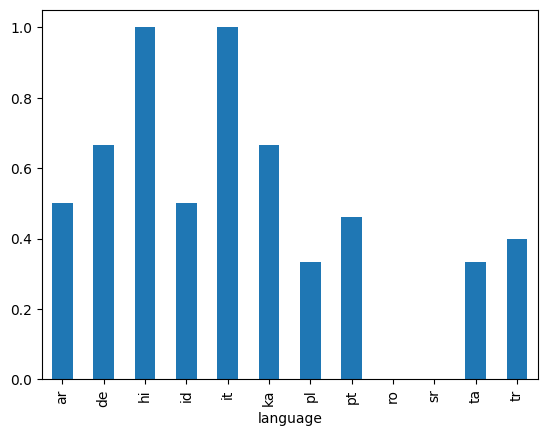

In [76]:
import numpy as np
import matplotlib.pyplot as plt

#check if cohere results match, by language

#make a new column for whether cohere matches by language
def match_tv(row):
    if row['simple_truth'] == row['cohere_simple']:
        return 1
    else:
        return 0

df_results0['match'] = df_results0.apply(match_tv, axis=1)

#1 means everything was right, 0 means everything was wrong (since a 1 was added for a match, a 0 was added otherwise)
df_simple = df_results0.groupby("language")["match"].agg(np.mean)

df_simple.plot.bar("match")



